In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"C:\Users\ABHINANDAN\Desktop\data science\New folder\DSData-master\abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


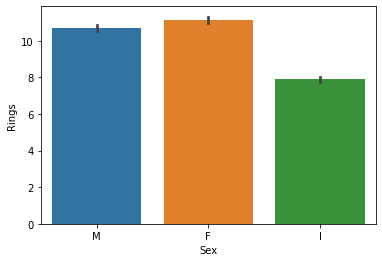

In [5]:
#Lets draw a bar graph for Rings and Sex
sns.barplot(x="Sex",y="Rings",data=df)
plt.show()

### Here 
     F = Female
     I = Infant
     M = Male
  From above plot we can say male and female has larger number of rings compared to infants

In [6]:
df=pd.get_dummies(df,drop_first=True)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


# Visualization of data

<AxesSubplot:xlabel='Length', ylabel='Rings'>

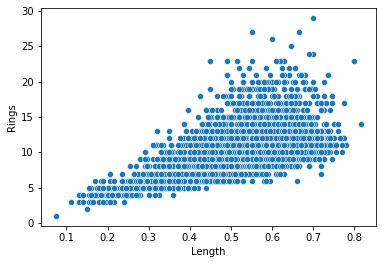

In [8]:
sns.scatterplot(x='Length',y='Rings',data=df)

 Here we can observe Length is directly in correlation with Ring count.

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

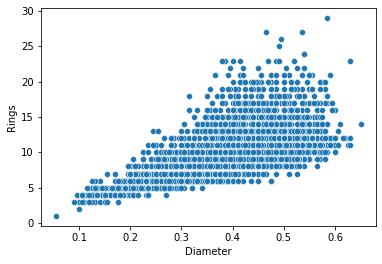

In [9]:
sns.scatterplot(x='Diameter',y='Rings',data=df)

From previous plot we came to know that length and diameter are correlated with each other. Aslo diameter is in relation with rings.

<AxesSubplot:xlabel='Height', ylabel='Rings'>

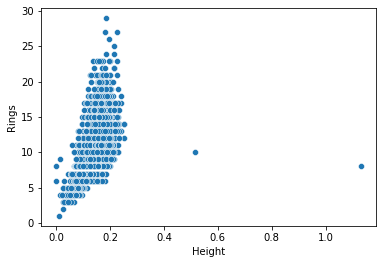

In [10]:
sns.scatterplot(x='Height',y='Rings',data=df)

the ring count lie in between 0.0 to 0.25 of height, as height increases the number of rings increases.

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

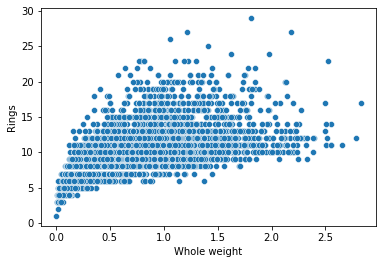

In [11]:
sns.scatterplot(x='Whole weight',y='Rings',data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

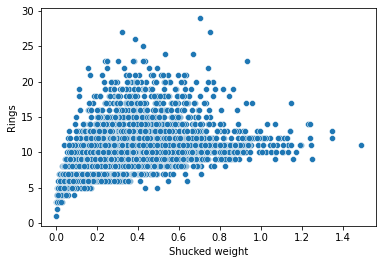

In [12]:
sns.scatterplot(x='Shucked weight',y='Rings',data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

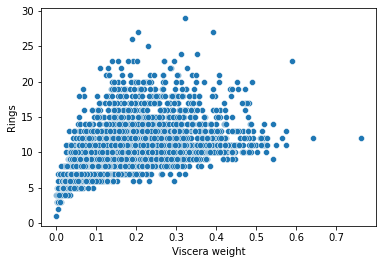

In [13]:
sns.scatterplot(x='Viscera weight',y='Rings',data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

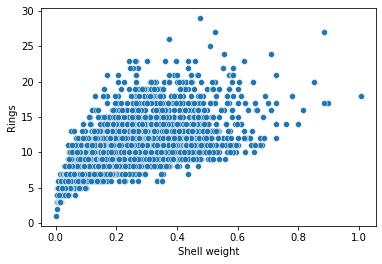

In [14]:
sns.scatterplot(x='Shell weight',y='Rings',data=df)

By observing above Whole weight,Shucked weight and Shell weight plots, these are related to each other, and the number of rings increases with weight

# Check Multi-collinearity problem

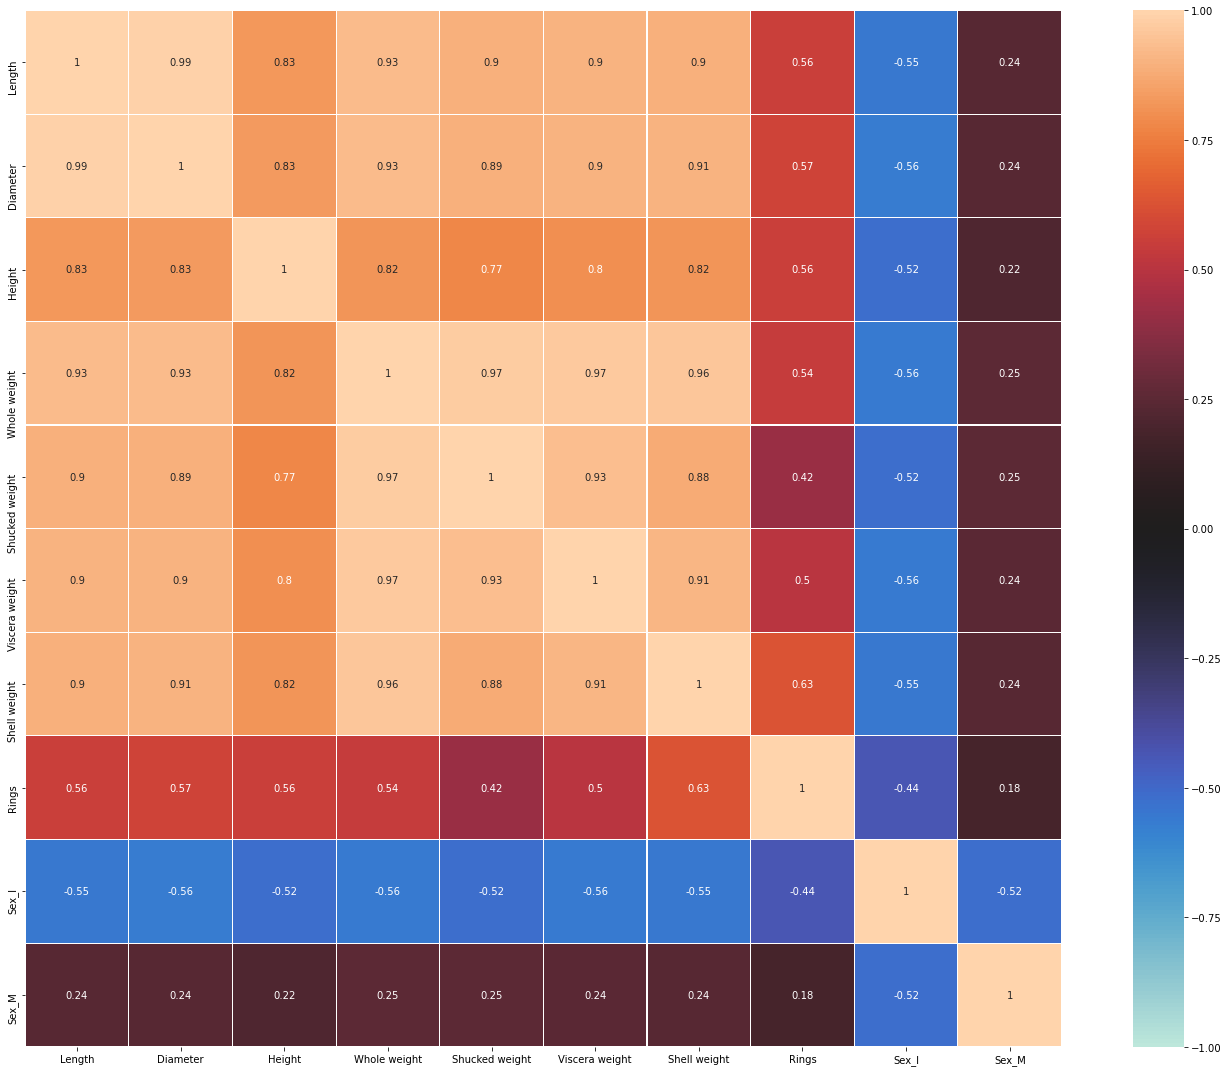

In [15]:
#Plotting Heatmap(Correlation matrix)
df_corr = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

Almost everything is strongly correlated with everything else, except ring count and sex column.

All of the features associated with weight are perfectly correlated with each other, with corr coefficients > 0.95 for whole weight as they're just the weights of different parts of the same abalone.

Also length and diameter are perfectly correlated with corr.coefficient = 0.99

In [16]:
#Lets describe the dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000


It seems like there are some outliers present 

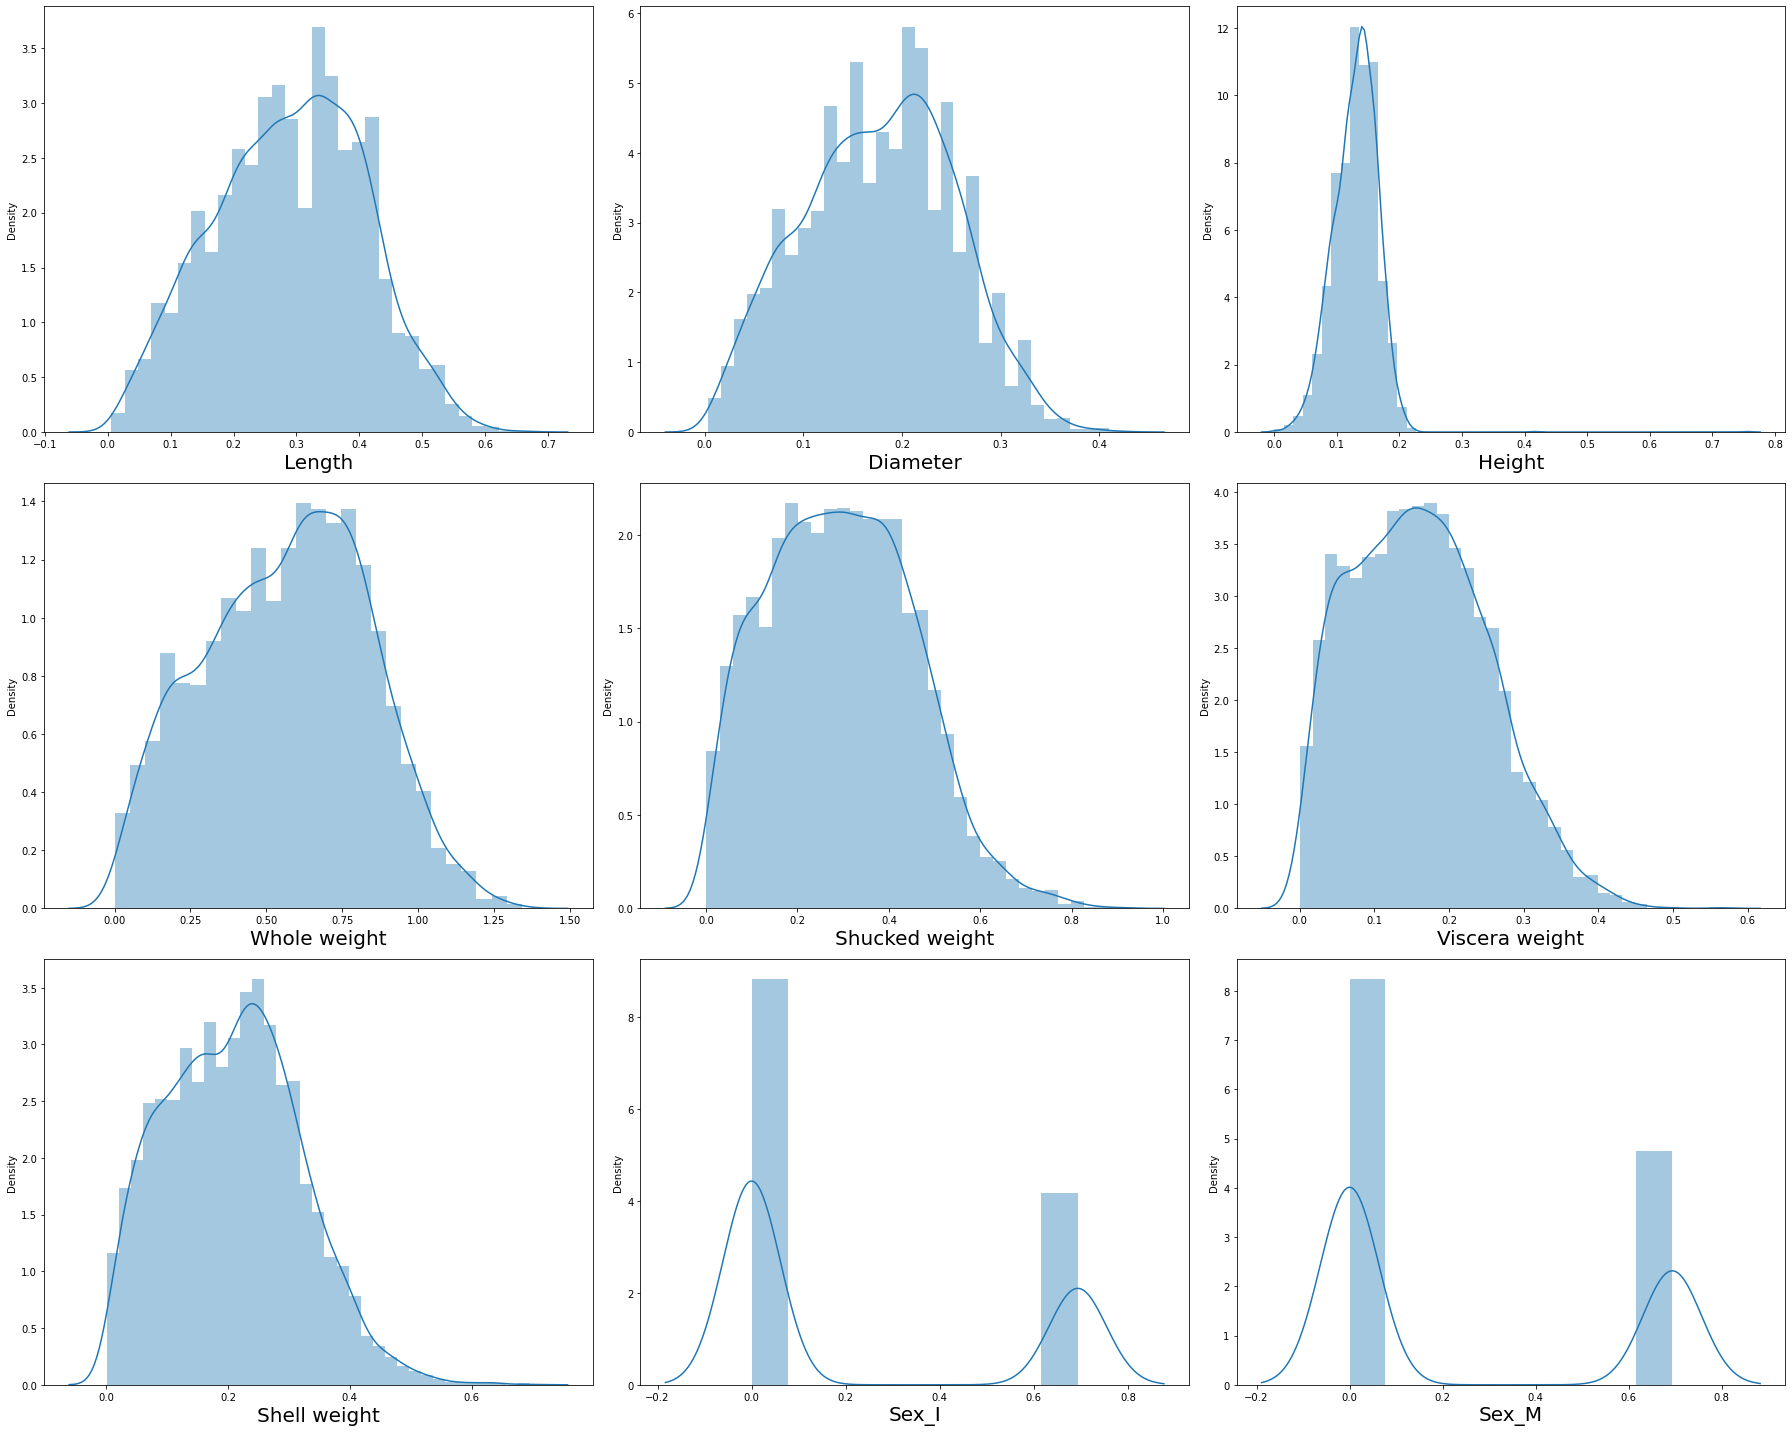

In [24]:
#Visualizing how data is distributed
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df_x:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_x[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [8]:
#apply zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


In [9]:
#before treating skewnees lets divide the dataset into features and label
df_x = df.drop(["Rings"],axis = 1)
y = df["Rings"]

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(df_x)

###### As the target variable data is continuous we are using regression models

In [11]:
#lets find the best random_state
from sklearn.tree import DecisionTreeRegressor
max_accu = 0
max_rs = 0
for i in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = i)
    dt =DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.20583546139744857 on Random State 69


In [12]:
#lets train test the data with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = max_rs )

In [13]:
#Model with DecesionTreeRegressor
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,pred_dt)
print("R2 Score :", r2)

RMSE : 2.855309331928683
R2 Score : 0.20267451220267296


In [14]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 2.123860275104853
R2 Score : 0.5588551621519184


In [15]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred_knr)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_knr)
print("R2 Score :", r2)

RMSE : 2.245578962666646
R2 Score : 0.5068421167186095


### Cross validation

In [19]:
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
#for DecesionTreeRegressor model
dt =DecisionTreeRegressor()
c_scores = cross_val_score(dt,X,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model is :", c_scores.mean())

Cross validation score of DecisionTreeRegressor model is : -0.18812526661751006


In [17]:
#for RandomForestRegressor model
c_scores = cross_val_score(rf,X,y,cv=5)
print("Cross validation score of RandomForestRegressor model is :", c_scores.mean())

Cross validation score of RandomForestRegressor model is : 0.42625634038901794


In [18]:
#for KNeighborsRegressor model
c_scores = cross_val_score(knr,X,y,cv=5)
print("Cross validation score of KNeighborsRegressor model is :", c_scores.mean())

Cross validation score of KNeighborsRegressor model is : 0.37378555571920097


From cross validation we can conclude that RandomForestRegressor has least difference of 13% in accuracy after cross validation
Se we will select RandomForestRegressor algorithm

### Hyperparameter Tunning

In [22]:
grid_params = {
                'max_depth': [2,5,6,9,10],
                'n_estimators':[200,500,700],
                }

In [23]:
GCV =  GridSearchCV(RandomForestRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 6, 9, 10],
                         'n_estimators': [200, 500, 700]})

In [24]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'max_depth': 9, 'n_estimators': 700}

In [25]:
#Let's train and test our model using best parameters
model = RandomForestRegressor(max_depth=9, n_estimators=700)

model.fit(x_train,y_train)
pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f"r2 Score: {r2_score(y_test,pred)*100}%")
print("---------------------------------------------------")
print("RMSE :", rmse)

r2 Score: 56.718363660212745%
---------------------------------------------------
RMSE : 2.1037163241824994


# Saving model

In [26]:
import joblib
joblib.dump(model,"abalone_age.pkl")

['abalone_age.pkl']